# Problem 2: CART-RF-ANN (REMAINIG PART - ANN MODAL BUILDING AND PERFORMACE CHECK)

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model

2.4 Final Model: Compare all the model and write an inference which model is best/optimized.

2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

Dataset for Problem 2: insurance_part2_data-1.csv




# Data Dictionary

1. Target: Claim Status (Claimed)

2. Code of tour firm (Agency_Code)

3. Type of tour insurance firms (Type)

4. Distribution channel of tour insurance agencies (Channel)

5. Name of the tour insurance products (Product)

6. Duration of the tour (Duration)

7. Destination of the tour (Destination)

8. Amount of sales of tour insurance policies (Sales)

9. The commission received for tour insurance firm (Commission)

10. Age of insured (Age)

## Load library and import data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [35]:
ins_df=pd.read_csv("insurance_part2_data.csv")

## Inspect the data

In [36]:
ins_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [37]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


# Converting all Object data Types into Numerical

In [38]:
print('Age \n',ins_df.Age.value_counts())
print('\n')
print('Agency_Code \n',ins_df.Agency_Code.value_counts())
print('\n')
print('Type \n',ins_df.Type.value_counts())
print('\n')
print('Claimed \n',ins_df.Claimed.value_counts())
print('\n')
print('Commision \n',ins_df.Commision.value_counts())
print('\n')
print('Channel \n',ins_df.Channel.value_counts())
print('\n')
print('Duration \n',ins_df.Duration.value_counts())
print('\n')
print('Sales \n',ins_df.Sales.value_counts())
print('\n')
print('Product Name \n',ins_df["Product Name"].value_counts())
print('\n')
print('Destination \n',ins_df.Destination.value_counts())

Age 
 36    999
31    125
48    108
30     96
35     94
     ... 
11      1
84      1
15      1
77      1
8       1
Name: Age, Length: 70, dtype: int64


Agency_Code 
 EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64


Type 
 Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64


Claimed 
 No     2076
Yes     924
Name: Claimed, dtype: int64


Commision 
 0.00     1366
63.21      62
54.00      61
23.76      61
7.70       57
         ... 
67.75       1
17.29       1
18.13       1
49.40       1
0.18        1
Name: Commision, Length: 324, dtype: int64


Channel 
 Online     2954
Offline      46
Name: Channel, dtype: int64


Duration 
  8       83
 5       82
 6       81
 10      81
 11      81
         ..
 466      1
 421      1
-1        1
 119      1
 4580     1
Name: Duration, Length: 257, dtype: int64


Sales 
 20.00     225
10.00     163
22.00      79
252.85     60
216.00     59
         ... 
199.00      1
177.00      1
171.00      1
206.

In [39]:
ins_df.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

In [40]:
ins_df.shape

(3000, 10)

## Proportion of observations in Target classes

In [41]:
# Get the proportions
print(ins_df.Claimed.value_counts(normalize=True))
print('%0s',ins_df.Claimed.value_counts()[0],'\n','%1s',ins_df.Claimed.value_counts()[1])

No     0.692
Yes    0.308
Name: Claimed, dtype: float64
%0s 2076 
 %1s 924


# Train Test Split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
for feature in ins_df.columns: 
    if ins_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(ins_df[feature].unique()))
        print(pd.Categorical(ins_df[feature].unique()).codes)
        ins_df[feature] = pd.Categorical(ins_df[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [44]:
print('Age \n',ins_df.Age.value_counts())
print('\n')
print('Agency_Code \n',ins_df.Agency_Code.value_counts())
print('\n')
print('Type \n',ins_df.Type.value_counts())
print('\n')
print('Claimed \n',ins_df.Claimed.value_counts())
print('\n')
print('Commision \n',ins_df.Commision.value_counts())
print('\n')
print('Channel \n',ins_df.Channel.value_counts())
print('\n')
print('Duration \n',ins_df.Duration.value_counts())
print('\n')
print('Sales \n',ins_df.Sales.value_counts())
print('\n')
print('Product Name \n',ins_df["Product Name"].value_counts())
print('\n')
print('Destination \n',ins_df.Destination.value_counts())

Age 
 36    999
31    125
48    108
30     96
35     94
     ... 
11      1
84      1
15      1
77      1
8       1
Name: Age, Length: 70, dtype: int64


Agency_Code 
 2    1365
0     924
1     472
3     239
Name: Agency_Code, dtype: int64


Type 
 1    1837
0    1163
Name: Type, dtype: int64


Claimed 
 0    2076
1     924
Name: Claimed, dtype: int64


Commision 
 0.00     1366
63.21      62
54.00      61
23.76      61
7.70       57
         ... 
67.75       1
17.29       1
18.13       1
49.40       1
0.18        1
Name: Commision, Length: 324, dtype: int64


Channel 
 1    2954
0      46
Name: Channel, dtype: int64


Duration 
  8       83
 5       82
 6       81
 10      81
 11      81
         ..
 466      1
 421      1
-1        1
 119      1
 4580     1
Name: Duration, Length: 257, dtype: int64


Sales 
 20.00     225
10.00     163
22.00      79
252.85     60
216.00     59
         ... 
199.00      1
177.00      1
171.00      1
206.60      1
271.00      1
Name: Sales, Length: 380

In [45]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [46]:
ins_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [47]:
ld_df = ins_df

In [48]:
X = ld_df.drop("Claimed", axis=1)

y = ld_df.pop("Claimed") 

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test= train_test_split(X, y, test_size=.30, random_state=1)

In [51]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Obs',2100+900)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)
Total Obs 3000


# Scaling the variables

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
#Initialize an object for StandardScaler
sc = StandardScaler()

In [54]:
#Scale the training data
x_train = sc.fit_transform(X_train)

In [55]:
x_train

array([[-0.19192502,  0.72815922,  0.80520286, ..., -0.5730663 ,
         0.24642411, -0.43926017],
       [-0.19192502,  0.72815922,  0.80520286, ..., -0.26910565,
         0.24642411,  1.27851702],
       [-0.97188154, -1.28518425, -1.24192306, ...,  1.74601534,
         1.83381865, -0.43926017],
       ...,
       [-0.19192502,  0.72815922,  0.80520286, ...,  0.02103862,
         0.24642411, -0.43926017],
       [ 0.58803151,  1.73483096, -1.24192306, ..., -0.60069909,
        -1.34097044, -0.43926017],
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.53852532,
         1.83381865, -0.43926017]])

In [56]:
# Apply the transformation on the test data
x_test = sc.transform(X_test)

In [57]:
x_test

array([[-1.55684893, -0.27851251,  0.80520286, ...,  0.18683534,
        -1.34097044,  2.99629421],
       [ 1.66047173, -1.28518425, -1.24192306, ..., -0.48325974,
        -1.34097044, -0.43926017],
       [-0.87438698, -1.28518425, -1.24192306, ..., -0.62833187,
        -1.34097044, -0.43926017],
       ...,
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.47635155,
        -1.34097044, -0.43926017],
       [ 1.07550434,  1.73483096, -1.24192306, ..., -0.43490237,
        -1.34097044, -0.43926017],
       [-0.28941958,  1.73483096, -1.24192306, ..., -0.49016794,
        -1.34097044, -0.43926017]])

# Building Neural Network Model

In [131]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  
                    random_state=1,tol=0.01)

In [132]:
# We can also try below parameters Building and Training the modal 
#clf = MLPClassifier(hidden_layer_sizes=300, max_iter=500, verbose=True, random_state=1, tol=0.001)

In [133]:
# Fit the model on the training data
clf.fit(x_train, y_train)

Iteration 1, loss = 0.73190828
Iteration 2, loss = 0.70481842
Iteration 3, loss = 0.67377712
Iteration 4, loss = 0.64619472
Iteration 5, loss = 0.62272023
Iteration 6, loss = 0.60330223
Iteration 7, loss = 0.58732612
Iteration 8, loss = 0.57422402
Iteration 9, loss = 0.56310704
Iteration 10, loss = 0.55382327
Iteration 11, loss = 0.54599574
Iteration 12, loss = 0.53911673
Iteration 13, loss = 0.53335898
Iteration 14, loss = 0.52839899
Iteration 15, loss = 0.52391237
Iteration 16, loss = 0.51999360
Iteration 17, loss = 0.51649432
Iteration 18, loss = 0.51346008
Iteration 19, loss = 0.51074817
Iteration 20, loss = 0.50822930
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=1,
              solver='sgd', tol=0.01, verbose=True)

## Predicting training data

In [144]:
# use the model to predict the training data
y_pred1 = clf.predict(x_train)

## Evaluating model performance on training data

In [145]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

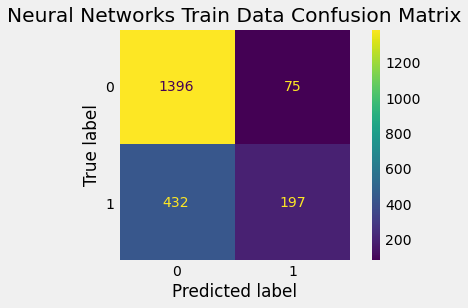

In [146]:
plot_confusion_matrix(clf,x_train,y_train)
plt.title('Neural Networks Train Data Confusion Matrix')
plt.grid(b=False,axis='both');

In [147]:
clf.score(x_train,y_train)

0.7585714285714286

In [148]:
print(classification_report(y_train, y_pred1))

              precision    recall  f1-score   support

           0       0.76      0.95      0.85      1471
           1       0.72      0.31      0.44       629

    accuracy                           0.76      2100
   macro avg       0.74      0.63      0.64      2100
weighted avg       0.75      0.76      0.72      2100



AUC: 0.792


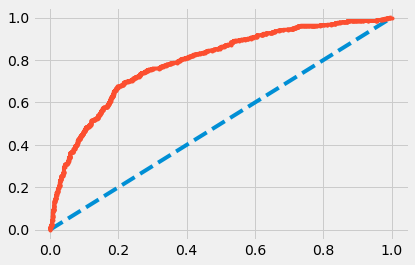

In [149]:
# AUC and ROC for the training data
# predict probabilities
probs = clf.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Predicting Test Data and comparing model performance

In [150]:
y_pred = clf.predict(x_test)

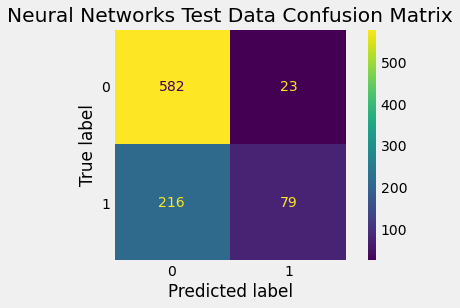

In [151]:
plot_confusion_matrix(clf,x_test,y_test)
plt.title('Neural Networks Test Data Confusion Matrix')
plt.grid(b = False, which='both');

In [152]:
clf.score(x_test,y_test)

0.7344444444444445

# Classification Report for Train and Test Dataset for Initial ANN Modal

In [157]:
print("Classification report for Train Dataset for Initial modal","\n",classification_report(y_train, y_pred1))

print("Classification report for Test Dataset for Initial modal","\n",classification_report(y_test, y_pred))

Classification report for Train Dataset for Initial modal 
               precision    recall  f1-score   support

           0       0.76      0.95      0.85      1471
           1       0.72      0.31      0.44       629

    accuracy                           0.76      2100
   macro avg       0.74      0.63      0.64      2100
weighted avg       0.75      0.76      0.72      2100

Classification report for Test Dataset for Initial modal 
               precision    recall  f1-score   support

           0       0.73      0.96      0.83       605
           1       0.77      0.27      0.40       295

    accuracy                           0.73       900
   macro avg       0.75      0.61      0.61       900
weighted avg       0.74      0.73      0.69       900



AUC: 0.767


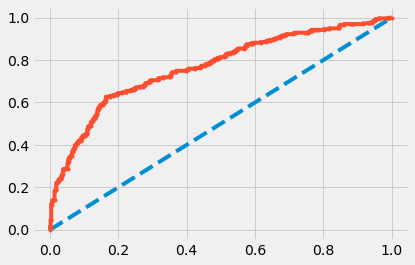

In [120]:
# AUC and ROC for the test data

# predict probabilities
probs = clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Model Tuning through Grid Search

**Below Code may take too much time.These values can be used instead {'hidden_layer_sizes': 500, 'max_iter': 5000, 'solver': 'adam', 'tol': 0.01}**

In [74]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [50,100,200,300,500],
    'max_iter': [500,750,1000,3000],
    'solver': ['sgd','adam'],
    'tol': [0.001],
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, 
                           param_grid = param_grid, cv = 10)

In [75]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [50, 100, 200, 300, 500],
                         'max_iter': [500, 750, 1000, 3000],
                         'solver': ['sgd', 'adam'], 'tol': [0.001]})

In [76]:
grid_search.best_params_

{'hidden_layer_sizes': 300, 'max_iter': 500, 'solver': 'adam', 'tol': 0.001}

In [77]:
best_grid = grid_search.best_estimator_

In [78]:
best_grid

MLPClassifier(hidden_layer_sizes=300, max_iter=500, random_state=1, tol=0.001)

## Prediction & Evaluation on Train Data

In [79]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

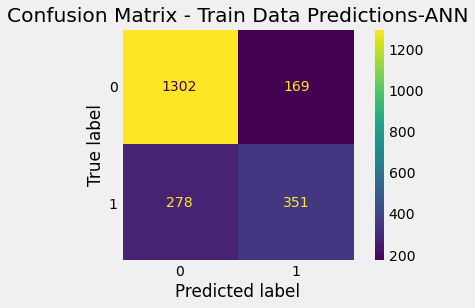

In [125]:
plot_confusion_matrix(best_grid,x_train,y_train)
plt.grid(b = False, which='both')
plt.title('Confusion Matrix - Train Data Predictions-ANN');

In [82]:
confusion_matrix(y_train,ytrain_predict) # alternate method to print CM

array([[1302,  169],
       [ 278,  351]], dtype=int64)

In [83]:
best_grid.score(x_train,y_train)

0.7871428571428571

In [84]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1471
           1       0.68      0.56      0.61       629

    accuracy                           0.79      2100
   macro avg       0.75      0.72      0.73      2100
weighted avg       0.78      0.79      0.78      2100



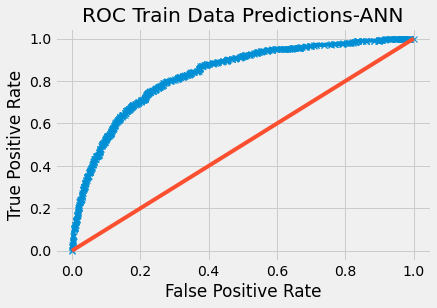

Area under Curve is 0.8322431881235415


In [158]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,best_grid.predict_proba(x_train)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Train Data Predictions-ANN')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,
                                           best_grid.predict_proba(x_train)[:,1]))

## Prediction & Evaluation on Test Data

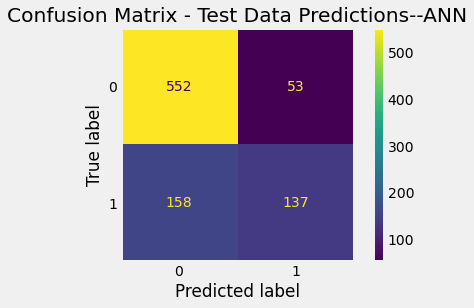

In [124]:
plot_confusion_matrix(best_grid, x_test,y_test)
plt.grid(b = False, which='both');
plt.title('Confusion Matrix - Test Data Predictions--ANN');

In [87]:
best_grid.score(x_test,y_test)

0.7655555555555555

# Classification Report for both Train and Test Dataset for best ANN Modal

In [156]:
print("A--Classification report for Train Dataset for Hypertuned modal","\n",classification_report(y_train,ytrain_predict))
print("B--Classification report for Test Dataset for Hypertuned modal","\n",classification_report(y_test,ytest_predict))

A--Classification report for Train Dataset for Hypertuned modal 
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1471
           1       0.68      0.56      0.61       629

    accuracy                           0.79      2100
   macro avg       0.75      0.72      0.73      2100
weighted avg       0.78      0.79      0.78      2100

B--Classification report for Test Dataset for Hypertuned modal 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.72      0.46      0.56       295

    accuracy                           0.77       900
   macro avg       0.75      0.69      0.70       900
weighted avg       0.76      0.77      0.75       900



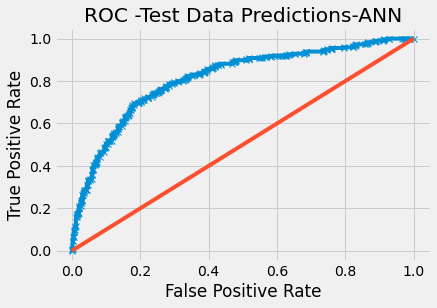

Area under Curve is 0.8134668721109399


In [160]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,best_grid.predict_proba(x_test)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC -Test Data Predictions-ANN')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,best_grid.predict_proba(x_test)[:,1]))

# Conclusion

* Neural Network Train set	Neural Network Test set

**Accuracy     	0.79	      0.77

**AUC         	0.84	      0.82

**Recall	        0.56	      0.46

**Precision	    0.68	      0.72

**F1 Score	    0.61	      0.56



Accuracy on the training data is 79% and on test data is 77%. The precision and recall metrics are also almost similar between training and test set, which indicates no overfitting or underfitting has happened. 
  
best_grid model has better improved performance over the initial clf model as the sensitivity was much lesser in the initial model.


# <B> 2.4 Final Model: Compare all the model and write an inference which model is best/optimized.

<b>By analyzing all the Models we made a table of varous parameters as below

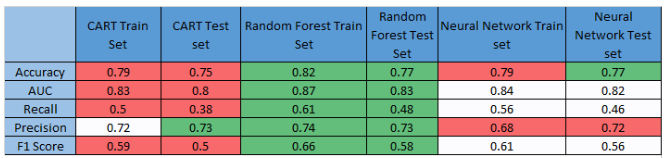

<b>As we can see that in all the models Train and Test results are almost similar but we have to compare all the Models and find out the best model among all.

Having a Glance on the table we can noticed Green Colour for Random Forest Model which shows that Train and test set results are high among all the models so can Conclude that Random forest model is best/optimized Model.

Neural network Model have given better results but their results are lesser optimized in comparison to Random Forest Model. Thus this model is medium performed model.

As you can also see red marked in the report of CART test in which both Train and Test set results are Low as compared to all so this is Lowest Optimized Model.


# 2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

<b>By using Various Algorithms like  CART, Random Forest and Artificial Neural Networks we analysed the data and found that More data needs to be collected like there is no unique identifier present so we are unable to clearly distinguished the duplicates also we find out the data points which needs to be collected like Insurance Cost , their location of incident , How often they are travelling , What is  their income etc .

Following are my Suggestions to Management 

• Since data set suggest that 90% of insurance done by online mode so we can increase their online experiences and also show the reviews about their insurance  for benefitted customers, this will increase the Confidence of customer which will increase the insurance sales and profit too. 

• we have found another interesting fact that more sales happen via Agency than Airlines and the trend shows the claim are processed more at Airline (See Box plot below. So have to find out why this is happening? 

 




• We need to talk with JZI & CWT agency to pick up sales as they Have lower sales (Refer Below figure) , We can also tell them to use Digital marketing tools to increase their reach to the customers .

 

• Insurance Company can also increase their Insurance Portfolio by adding more insurance plans like health insurance , Corporate accidental Insurance etc to increase their revenue

Below are the some  Key performance indicators (KPI) of insurance claims are: 
	Average Cost Per Claim
    
	Claim Frequency
    
	Average Time to Settle a Claim
    
	Claims Ratio
    
	Increase customer satisfaction 

Based on the above Insurance Company can make automated reporting process to senior officials of the company if a claim is pending from more than 1 week so that genuine claims can’t be neglected; this will Build the reputation of the company in the customer’s eye.
